In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.1


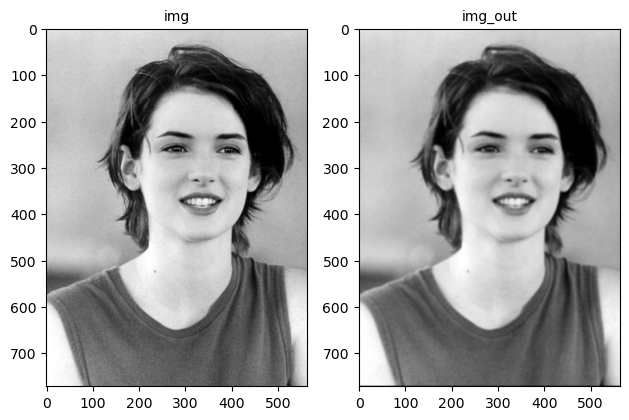

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D
import numpy as np
import cv2
import matplotlib.pyplot as plt
kernel_size = 5
# When padding="same" and strides=1, the output has the same size as the input.
stride = 1
padding = "same"
# Steps 2~9 (25 points)
# Enter your code here.
inputs = tf.keras.Input((None, None, 1))
outputs = Conv2D(1, kernel_size, stride, padding, name='conv1')(inputs) 
# print(inputs.shape) # (None, None, None, 1) # inputs' shape will automatically be added batch_size dimension
# print(outputs.shape) # (None, None, None, 1)
filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)

bias = np.array([0])
value = 1 / (kernel_size ** 2)
weights = np.full((kernel_size, kernel_size, 1, 1), value) # (kernel_height, kernel_width, in_channels, out_channels)
filter_net.get_layer('conv1').set_weights([weights, bias])

img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)
image_shape = img.shape
# print(image_shape)
img_batch = np.expand_dims(img, axis=(0, -1))
# print(img_batch.shape)

img_out = filter_net(img_batch) # input shape is (1, 772, 564)
# print(img_out.shape)
# Reshape `img_out` such that its shape is (772, 564)
img_out = np.squeeze(img_out, axis=(0, -1))
# print(img_out.shape)
img_out = np.array(img_out, dtype=np.uint8)

ax_img = plt.subplot(1, 2, 1)
ax_img.set_title("img", fontsize=10)
ax_img.imshow(img, cmap='gray')

ax_img = plt.subplot(1, 2, 2)
ax_img.set_title("img_out", fontsize=10)
ax_img.imshow(img_out, cmap='gray')
plt.tight_layout()
plt.show()
#[Question 1 (5 points)] If kernel_size in Steps 3 and 5 is changed from 5 to 11,
# how will img_out change (more blurry or more clear)? Why?
# Answer:
# img_out will become more blurry because the convolution operation that does average on the pixel area of the kernel will average the pixel values over a larger neighborhood. 
# A larger averaging kernel will smooth out the edge more, so it will get a more blurry image output.
# When kernel size is 5, kernel will average over 25 pixels.
# When kernel size is 11, kernel will average over 121 pixels.

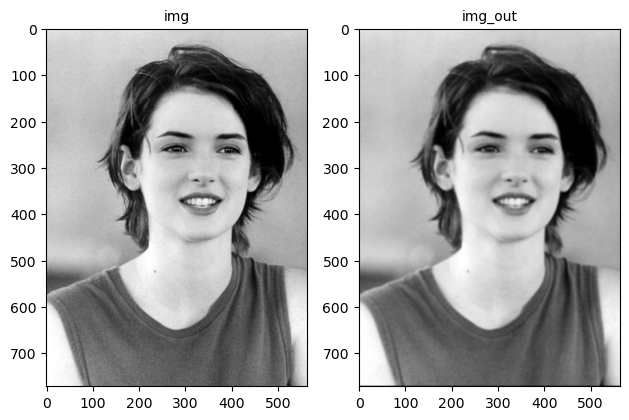

In [3]:
# Steps 10~13 (15 points)
# Enter your code here.
pad = int((kernel_size-1) / 2)
img_pad = np.zeros((772+2*pad, 564+2*pad)) # (776, 568)
img_pad[1*pad:772+1*pad, 1*pad:564+1*pad] = img
'''
step2-stpe5
'''
kernel_size = 5
# When padding="same" and strides=1, the output has the same size as the input.
stride = 1
padding = "valid"
# Steps 2~9 (25 points)
# Enter your code here.
inputs = tf.keras.Input((None, None, 1))
outputs = Conv2D(1, kernel_size, stride, padding, name='conv1')(inputs) 
# print(inputs.shape) # (None, None, None, 1) # inputs' shape will automatically be added batch_size dimension
# print(outputs.shape) # (None, None, None, 1)
filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)

bias = np.array([0])
value = 1 / (kernel_size ** 2)
weights = np.full((kernel_size, kernel_size, 1, 1), value) # (kernel_height, kernel_width, in_channels, out_channels)
filter_net.get_layer('conv1').set_weights([weights, bias])
'''
step12-stpe13
'''
img_batch = np.expand_dims(img_pad, axis=(0, -1)) # shape become  (1, 776, 568, 1)

img_out = filter_net(img_batch) # input shape is (1, 776, 568, 1)
# Reshape `img_out` such that its shape is (772, 564)
img_out = np.squeeze(img_out, axis=(0, -1))
img_out = np.array(img_out, dtype=np.uint8)
# print(img_out.shape) # (772, 564)
ax_img = plt.subplot(1, 2, 1)
ax_img.set_title("img", fontsize=10)
ax_img.imshow(img, cmap='gray')

ax_img = plt.subplot(1, 2, 2)
ax_img.set_title("img_out", fontsize=10)
ax_img.imshow(img_out, cmap='gray')
plt.tight_layout()
plt.show()
# [Question 2 (5 points)] Let Step 2 to Step 9 be denoted as Method 1, and Step 10 to Step 13 be denoted as Method 2. 
# Why Methods 1 and 2 lead to the same results?
# Method 2 manually adds the padding, which can makes the input shape the same as the output's.
# Method 1 adds the padding with size automatically calculated by TensorFlow, and padding values are also zero, which is the same as method 2.
# Hence, the two methods lead to the same results.